In [ ]:
import pandas as pd
import json
import re

df_obama = pd.read_json('../data/entities/DistilBERTobama_entities.json', lines=True)
df_trump = pd.read_json('../data/entities/DistilBERTtrump_entities.json', lines=True)
df_biden = pd.read_json('../data/entities/DistilBERTbiden_entities.json', lines=True)

# Function to preprocess and merge entities
def preprocess_entities(entity_list):
    merged_entities = []
    temp_entity = []
    for entity, label in entity_list:
        # Check if the entity is a continuation of the previous one (look for subword markers or periods)
        if re.match(r'^[##\.]', entity) or (temp_entity and re.match(r'[\.]', temp_entity[-1][0])):
            temp_entity.append((entity, label))
        else:
            if temp_entity:
                merged_entities.append(("".join(e[0].replace('##', '').replace('.', '') for e in temp_entity), temp_entity[0][1]))
            temp_entity = [(entity, label)]
    
    if temp_entity:
        merged_entities.append(("".join(e[0].replace('##', '').replace('.', '') for e in temp_entity), temp_entity[0][1]))

    return merged_entities

def format_and_save(df, filename):
    df['entities'] = df['entities'].apply(preprocess_entities)
    df['entities'] = df['entities'].apply(lambda x: json.dumps([{"text": ent[0], "label": ent[1]} for ent in x]))
    df.to_csv(filename, index=False)

format_and_save(df_obama, '../data/entities/DistilBERTobama_entities.csv')
format_and_save(df_trump, '../data/entities/DistilBERTtrump_entities.csv')
format_and_save(df_biden, '../data/entities/DistilBERTbiden_entities.csv')


In this section, I will conduct an individual analysis of Named Entity Recognition (NER) results for each of the three presidents—Barack Obama, Donald Trump, and Joe Biden. The primary goal of this analysis is to identify the key entities (such as countries, organizations, and people) frequently associated with each president during their time in office. By isolating and counting the occurrences of these entities, I aim to uncover patterns in their discourse on significant topics like foreign policy, domestic affairs, and key political figures

In [ ]:
import pandas as pd
from collections import Counter
import json


# Analyze top entities for a given president
def analyze_top_entities(file_path, president_name, top_n=10):

    df = pd.read_csv(file_path)

    person_counter = Counter()
    org_counter = Counter()
    loc_counter = Counter()

    for entities_json in df['entities']:
        entities = json.loads(entities_json)
        for entity in entities:
            if entity['label'] == 'PER':  # Person
                person_counter[entity['text']] += 1
            elif entity['label'] == 'ORG':  # Organization
                org_counter[entity['text']] += 1
            elif entity['label'] == 'LOC':  # Location
                loc_counter[entity['text']] += 1

    top_persons = person_counter.most_common(top_n)
    top_orgs = org_counter.most_common(top_n)
    top_locs = loc_counter.most_common(top_n)

    print(f"Top {top_n} persons for {president_name}: {top_persons}")
    print(f"Top {top_n} organizations for {president_name}: {top_orgs}")
    print(f"Top {top_n} locations for {president_name}: {top_locs}")
    print("\n")


president_files = {\
    'Obama': '../data/entities/DistilBERTobama_entities.csv',
    'Trump': '../data/entities/DistilBERTtrump_entities.csv',
    'Biden': '../data/entities/DistilBERTbiden_entities.csv'
}

for president_name, file_path in president_files.items():
    analyze_top_entities(file_path, president_name, top_n=10)

Top 10 persons for Obama: [('Obama', 1306), ('Clinton', 776), ('Kerry', 715), ('KERRY', 707), ('Hillary Rodham Clinton', 359), ('John Kerry', 261), ('Assad', 123), ('Hillary Clinton', 94), ('Burns', 86), ('Daesh', 70)]
Top 10 organizations for Obama: [('State Department', 1297), ('Department of State', 980), ('Department', 602), ('UN', 536), ('NATO', 376), ('Congress', 365), ('The', 286), ('United Nations', 267), ('European Union', 250), ('ISIL', 242)]
Top 10 locations for Obama: [('United States', 7061), ('Syria', 1082), ('Afghanistan', 934), ('Iran', 888), ('Pakistan', 683), ('China', 680), ('Iraq', 655), ('Washington', 596), ('Russia', 473), ('United', 469)]


Top 10 persons for Trump: [('Pompeo', 1387), ('Trump', 1130), ('Michael R Pompeo', 1093), ('Morgan Ortagus', 472), ('Mike Pompeo', 348), ('Rex', 342), ('Heather Nauert', 305), ('Maduro', 284), ('Tillerson', 264), ('John J Sullivan', 212)]
Top 10 organizations for Trump: [('State Department', 1112), ('Department of State', 736)

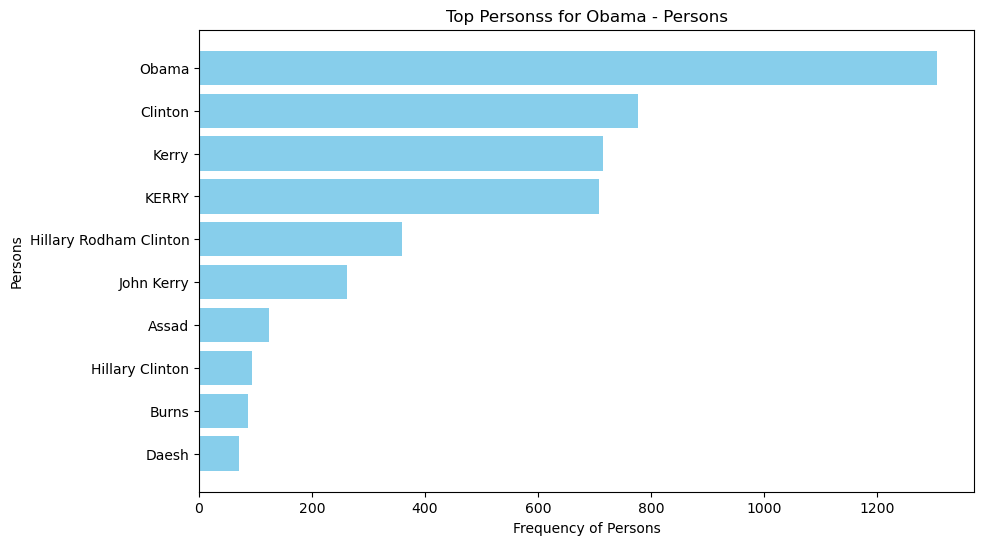

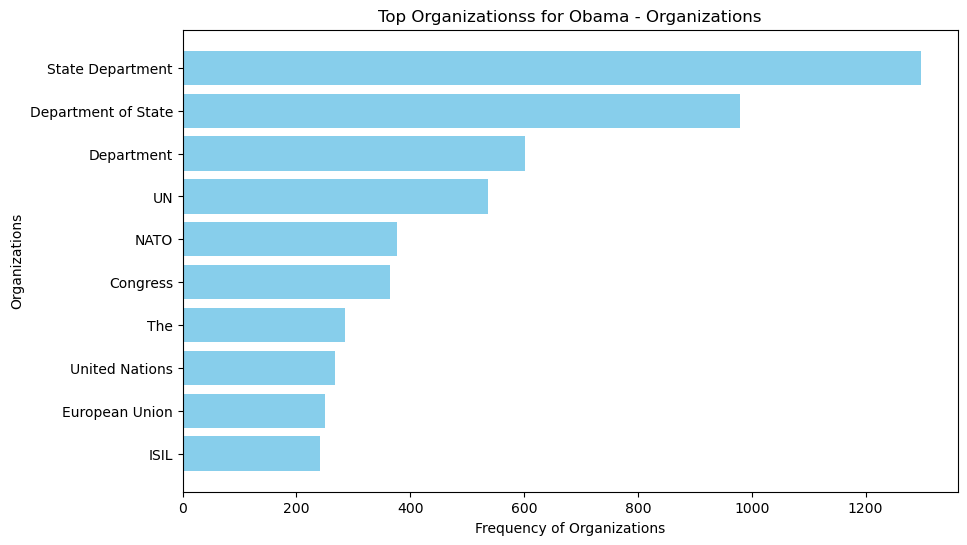

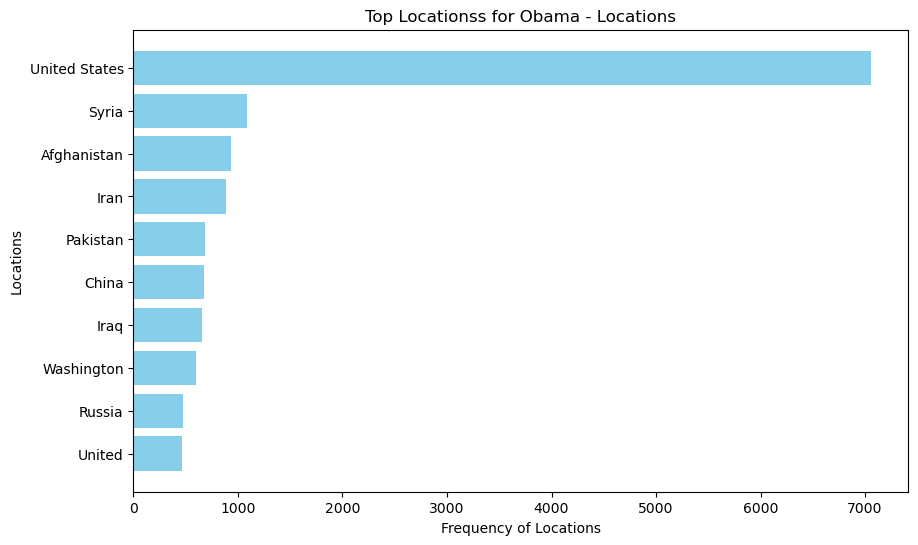

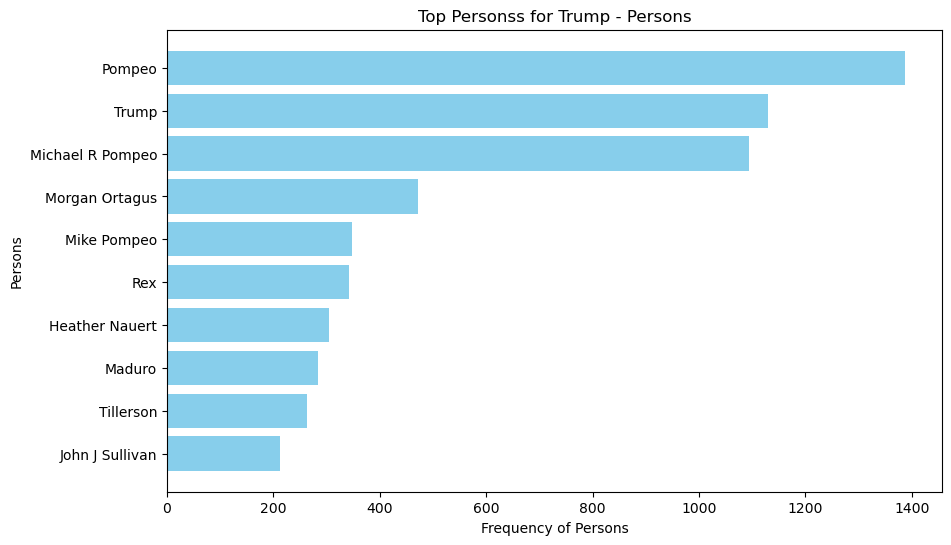

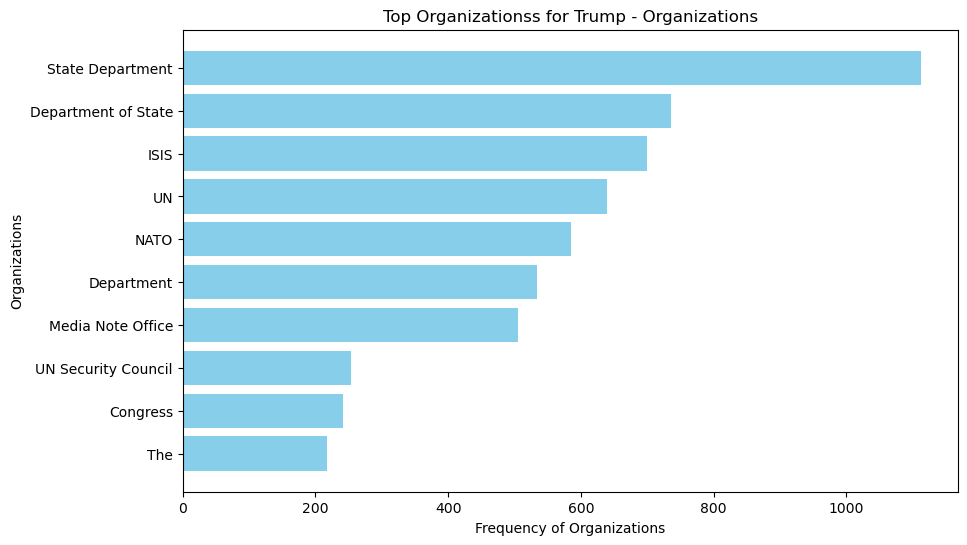

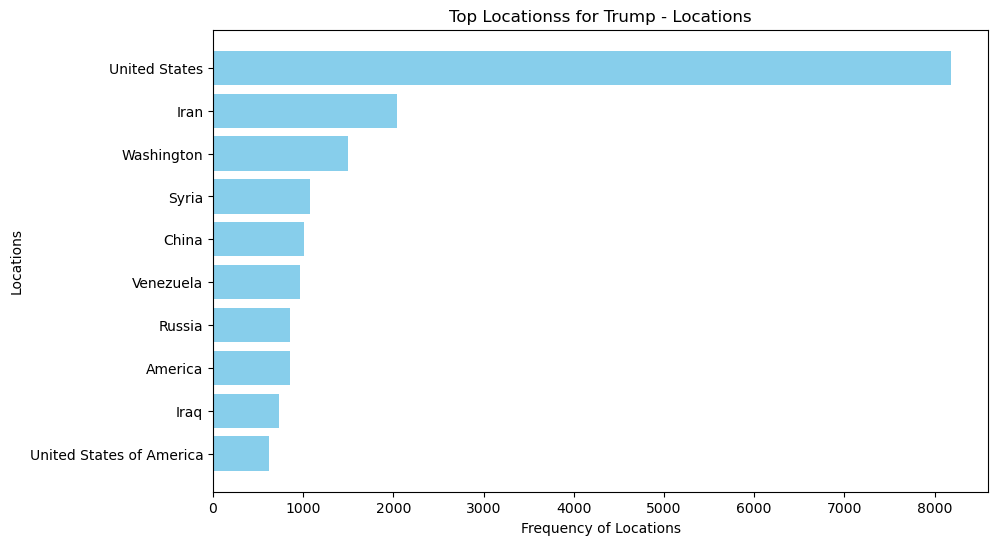

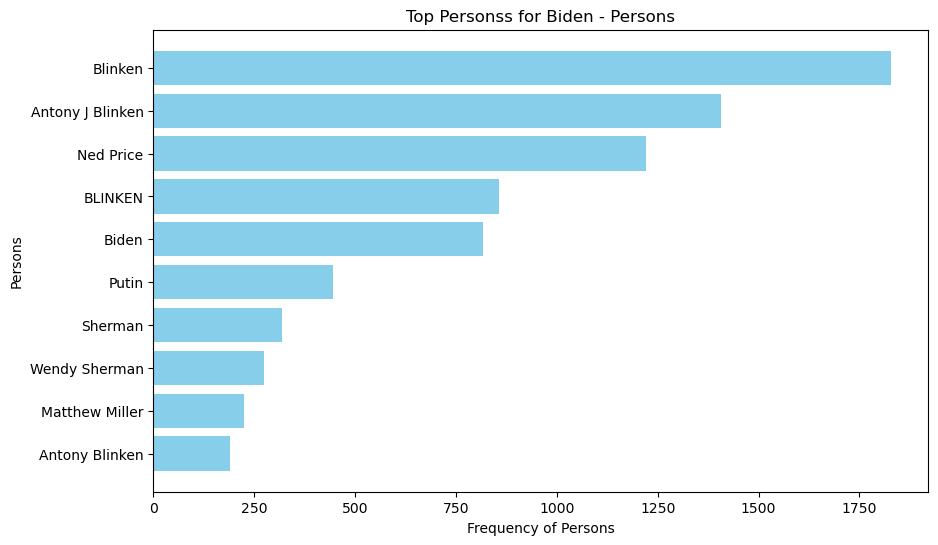

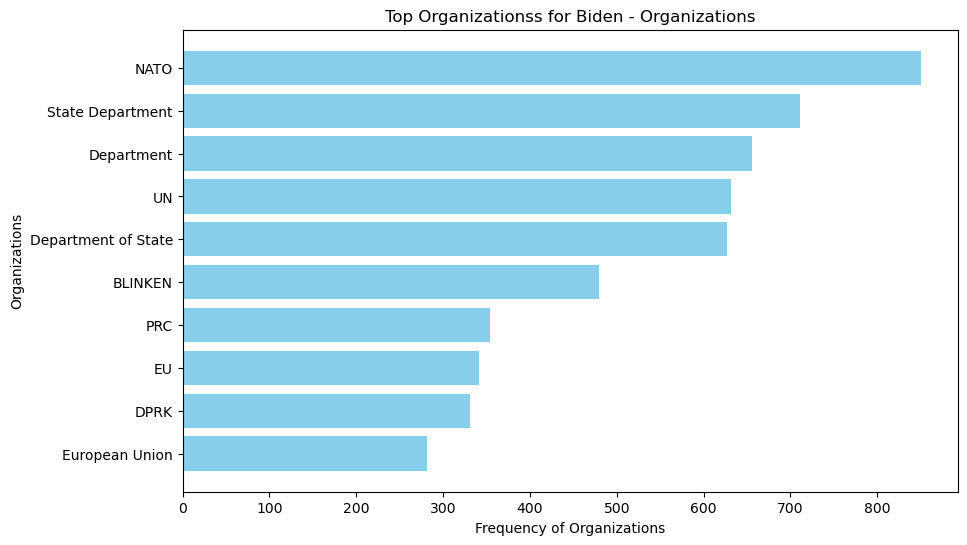

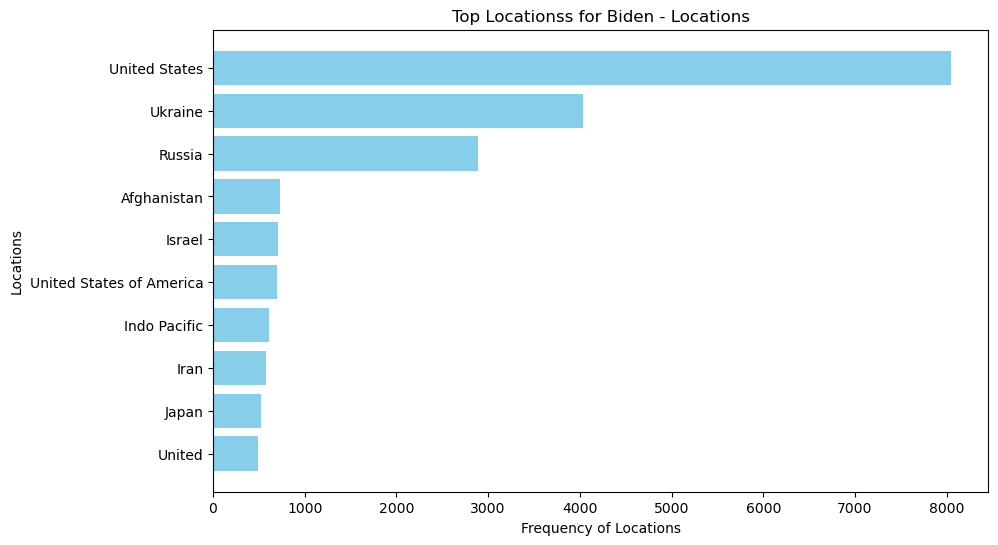

In [ ]:
import pandas as pd
from collections import Counter
import json
import matplotlib.pyplot as plt

# Function to analyze top entities for a given president
def analyze_top_entities(file_path, top_n=10):

    df = pd.read_csv(file_path)

    person_counter = Counter()
    org_counter = Counter()
    loc_counter = Counter()

    for entities_json in df['entities']:
        entities = json.loads(entities_json)
        for entity in entities:
            if entity['label'] == 'PER':  # Person
                person_counter[entity['text']] += 1
            elif entity['label'] == 'ORG':  # Organization
                org_counter[entity['text']] += 1
            elif entity['label'] == 'LOC':  # Location
                loc_counter[entity['text']] += 1

    top_persons = person_counter.most_common(top_n)
    top_orgs = org_counter.most_common(top_n)
    top_locs = loc_counter.most_common(top_n)

    return top_persons, top_orgs, top_locs
def plot_top_entities(entities, title, entity_type, president_name):
    labels, values = zip(*entities)
    plt.figure(figsize=(10, 6))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel(f'Frequency of {entity_type}')
    plt.ylabel(entity_type)
    plt.title(f'Top {entity_type}s for {president_name} - {title}')
    plt.gca().invert_yaxis()  # To display the highest values at the top
    plt.show()



for president_name, file_path in president_files.items():
    top_persons, top_orgs, top_locs = analyze_top_entities(file_path, top_n=10)
    
    plot_top_entities(top_persons, 'Persons', 'Persons', president_name)
    
    plot_top_entities(top_orgs, 'Organizations', 'Organizations', president_name)
    
    plot_top_entities(top_locs, 'Locations', 'Locations', president_name)

In [ ]:
import pandas as pd
from collections import Counter
import json

# Function to analyze entity type counts for a given president
def analyze_entity_types(file_path, president_name):

    df = pd.read_csv(file_path)

    entity_type_counter = Counter()

    for entities_json in df['entities']:
        entities = json.loads(entities_json)
        for entity in entities:
            entity_type_counter[entity['label']] += 1

    # Print the entity type distribution for this president
    print(f"Entity type distribution for {president_name}:")
    print(f"Persons (PER): {entity_type_counter['PER']}")
    print(f"Organizations (ORG): {entity_type_counter['ORG']}")
    print(f"Locations (LOC): {entity_type_counter['LOC']}")
    print("\n")

# Analyze entity types for each president
for president_name, file_path in president_files.items():
    analyze_entity_types(file_path, president_name)

Entity type distribution for Obama:
Persons (PER): 21579
Organizations (ORG): 33657
Locations (LOC): 52111


Entity type distribution for Trump:
Persons (PER): 21884
Organizations (ORG): 28742
Locations (LOC): 56058


Entity type distribution for Biden:
Persons (PER): 22238
Organizations (ORG): 28065
Locations (LOC): 55926




Comparative analysis

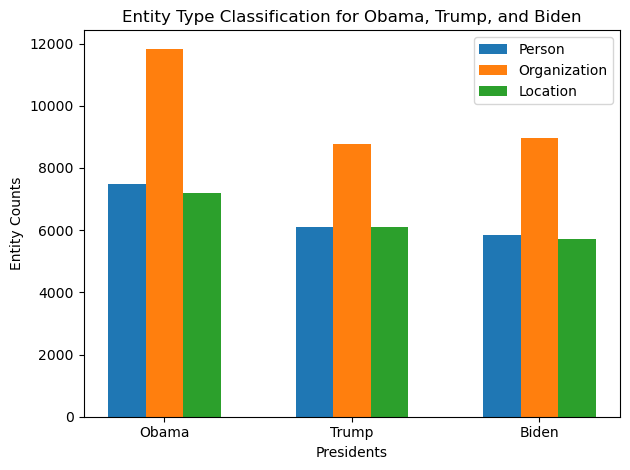

In [ ]:
import pandas as pd
from collections import Counter
import json
import matplotlib.pyplot as plt

# Function to analyze entity types for a given president
def analyze_entity_types(file_path):

    df = pd.read_csv(file_path)

    person_counter = Counter()
    org_counter = Counter()
    loc_counter = Counter()

    for entities_json in df['entities']:
        entities = json.loads(entities_json)
        for entity in entities:
            if entity['label'] == 'PER':  # Person
                person_counter[entity['text']] += 1
            elif entity['label'] == 'ORG':  # Organization
                org_counter[entity['text']] += 1
            elif entity['label'] == 'LOC':  # Location
                loc_counter[entity['text']] += 1

    return len(person_counter), len(org_counter), len(loc_counter)


# Initialize a dictionary to hold the counts of each entity type
entity_counts = {
    'Person': [],
    'Organization': [],
    'Location': []
}

# List of president names for the plot
presidents = list(president_files.keys())

# Analyze entity types for each president and store the results
for president_name, file_path in president_files.items():
    person_count, org_count, loc_count = analyze_entity_types(file_path)
    entity_counts['Person'].append(person_count)
    entity_counts['Organization'].append(org_count)
    entity_counts['Location'].append(loc_count)

# Plotting the results
bar_width = 0.2
index = range(len(presidents))

plt.bar(index, entity_counts['Person'], bar_width, label='Person')
plt.bar([i + bar_width for i in index], entity_counts['Organization'], bar_width, label='Organization')
plt.bar([i + bar_width * 2 for i in index], entity_counts['Location'], bar_width, label='Location')

plt.xlabel('Presidents')
plt.ylabel('Entity Counts')
plt.title('Entity Type Classification for Obama, Trump, and Biden')
plt.xticks([i + bar_width for i in index], presidents)

plt.legend()
plt.tight_layout()
plt.show()

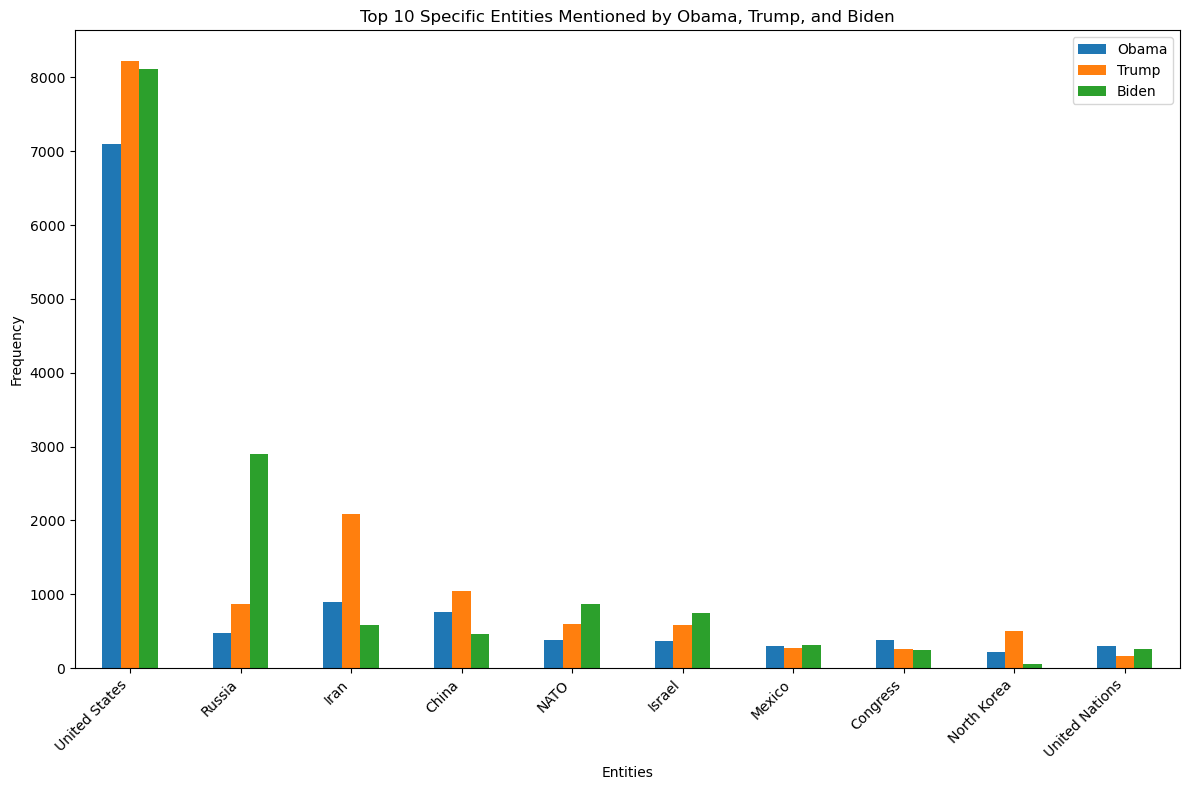

In [ ]:
import pandas as pd
from collections import Counter
import json
import matplotlib.pyplot as plt
import numpy as np

# List of specific entities for comparison
specific_entities = [
    'United States', 'China', 'Russia', 'Congress', 'Barack Obama', 'Joe Biden', 'Donald Trump',  # Initial list

    # Countries and international organizations
    'North Korea', 'Iran', 'United Nations', 'NATO', 'European Union', 'Israel', 'Mexico', 'Saudi Arabia',

    # Key domestic institutions and actors
    'Supreme Court', 'Republican Party', 'Democratic Party', 'FBI', 'CIA', 'Senate', 'House of Representatives',
    
    # Political figures and leaders
    'Hillary Clinton', 'Vladimir Putin', 'Xi Jinping', 'Angela Merkel', 'Kim Jong-un', 'Benjamin Netanyahu',

    # Economic topics
    'Federal Reserve', 'Wall Street', 'Healthcare', 'Tax Reform', 'Trade War', 'Unemployment', 'Jobs', 'Economy',

    # Major issues
    'Climate Change', 'Immigration', 'Gun Control', 'Racial Justice', 'COVID-19', 'Terrorism', 'Healthcare Reform',

    # Key international agreements and treaties
    'Paris Agreement', 'Iran Nuclear Deal', 'USMCA', 'Trans-Pacific Partnership',

    # Specific policies and events
    'Obamacare', 'DACA', 'Build Back Better', 'Infrastructure', 'Border Wall', 'Travel Ban'
]

# Function to count occurrences of specific entities in the NER results
def count_specific_entities(file_path, president_name, specific_entities):

    df = pd.read_csv(file_path)
    
    entity_counter = Counter()

    for entities_json in df['entities']:
        entities = json.loads(entities_json)
        for entity in entities:
            if entity['text'] in specific_entities:
                entity_counter[entity['text']] += 1
    
    return entity_counter

# Analyze the frequency of specific entities for each president
president_entity_counts = {}
for president_name, file_path in president_files.items():
    entity_count = count_specific_entities(file_path, president_name, specific_entities)
    president_entity_counts[president_name] = entity_count

# Convert the counts into a DataFrame for easy comparison
entity_df = pd.DataFrame(president_entity_counts).fillna(0)

# Sort the DataFrame by the sum of occurrences across all presidents
entity_df['Total'] = entity_df.sum(axis=1)
entity_df = entity_df.sort_values(by='Total', ascending=False).drop(columns='Total')

# Visualize the top 10 entities for each president
top_entities = 10
fig, ax = plt.subplots(figsize=(12, 8))

entity_df.head(top_entities).plot(kind='bar', ax=ax)
ax.set_title('Top 10 Specific Entities Mentioned by Obama, Trump, and Biden')
ax.set_xlabel('Entities')
ax.set_ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.
plt.show()

In [ ]:
# COMPARATIVE ANALYSIS

import pandas as pd
import json
from collections import Counter

# Function to load and extract entities from the CSV file
def load_entities(ner_file):
    df = pd.read_csv(ner_file)
    all_entities = []
    
    for entities_str in df['entities']:
        if pd.notna(entities_str):
            entities = json.loads(entities_str)
            for entity in entities:
                all_entities.append(entity['text'].lower())  # Convert to lowercase for standardization
    
    return all_entities

# Function to count the frequency of each entity
def count_entities(entities):
    return Counter(entities)

# Function to compare top entities across presidents
def compare_entities(obama_entities, trump_entities, biden_entities, top_n=10):
    obama_counter = count_entities(obama_entities)
    trump_counter = count_entities(trump_entities)
    biden_counter = count_entities(biden_entities)
    

    obama_top = obama_counter.most_common(top_n)
    trump_top = trump_counter.most_common(top_n)
    biden_top = biden_counter.most_common(top_n)


    comparison_df = pd.DataFrame({
        'Obama': dict(obama_top),
        'Trump': dict(trump_top),
        'Biden': dict(biden_top)
    }).fillna(0)  # Fill missing values with 0
    
    return comparison_df

obama_entities = load_entities('../data/entities/DistilBERTobama_entities.csv')
trump_entities = load_entities('../data/entities/DistilBERTtrump_entities.csv')
biden_entities = load_entities('../data/entities/DistilBERTbiden_entities.csv')


comparison_df = compare_entities(obama_entities, trump_entities, biden_entities, top_n=10)


print(comparison_df)

                      Obama   Trump   Biden
united states        7103.0  8233.0  8112.0
kerry                1455.0     0.0     0.0
obama                1378.0     0.0     0.0
state department     1349.0  1155.0     0.0
american             1251.0  1753.0   835.0
syria                1094.0  1095.0     0.0
department of state   981.0     0.0     0.0
afghanistan           944.0     0.0     0.0
iran                  900.0  2100.0     0.0
us-                   854.0  1140.0  1288.0
washington              0.0  1574.0     0.0
pompeo                  0.0  1397.0     0.0
trump                   0.0  1150.0     0.0
iranian                 0.0  1113.0     0.0
ukraine                 0.0     0.0  4049.0
blinken                 0.0     0.0  3172.0
russia                  0.0     0.0  2914.0
antony j blinken        0.0     0.0  1407.0
ned price               0.0     0.0  1220.0
russian                 0.0     0.0  1043.0
nato                    0.0     0.0   864.0
